In [1]:
import numpy as np
import control
import control.matlab
import math            
import cmath
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from control_utils import step_info, step_info_theoretical, plot_responses, errors

from pprint import pprint

In [2]:
# Parâmetros desejado
zeta = 0.5;
wn = 4;
T = 0.2;

# função de transferência da planta
Gp = control.tf(1,[1, 2, 0]);
Gz = control.c2d(Gp,T);

In [22]:
np.angle(control.tf([1, -0.6703], [1, -0.2543], T)(z1))*180/np.pi

51.258964245476406

In [3]:
wd = wn*np.sqrt(1-zeta**2)
ws = 2*np.pi/T
print(f'wd = {wd}')
print('ws/wd é %.2f (deve ser maior que 8)'%(ws/wd))

# Polo que satisfaz os parâmetros desejados
z1_abs = np.exp(-(2*np.pi*zeta*wd)/(np.sqrt(1-zeta**2)*ws))
z1_angle = T*wd
z1 = z1_abs*np.exp(z1_angle*1j)
print('O polo desejado é z1 =', z1)
# Cuidado: acho que estamos ignorando a parte imaginária de z1, o que está errado!!

wd = 3.4641016151377544
ws/wd é 9.07 (deve ser maior que 8)
O polo desejado é z1 = (0.5157762241044523+0.42813998968301875j)


In [4]:
alpha = -control.pole(Gz)[1]
G2z = control.minreal(control.tf([1, alpha],1,T)*Gz);
fi2 = np.angle(G2z(z1))
fi1 = -np.pi-fi2 #equivalente to: np.angle(control.tf([1], [1, beta], T)(z1))
beta = np.imag(z1)/np.tan(-fi1) -np.real(z1)

K = 1/np.abs((0.01758*(z1+0.8760))/((z1-1)*(z1-0.2543)))
print('alpha = %.2f'%alpha)
print('beta = %.2f'%beta)
print('K = %.2f'%K)

Gdz  = control.tf(K*np.array([1, alpha]), [1, beta], T)
print('O controlador digital é G_D(z):', Gdz)

1 states have been removed from the model
alpha = -0.67
beta = -0.25
K = 12.67
O controlador digital é G_D(z): 
12.67 z - 8.491
---------------
  z - 0.2543

dt = 0.2



In [5]:
FTMA = Gdz*Gz
FTMF = control.feedback(FTMA, 1)
FTMF = control.minreal(FTMF)
FTMF

1 states have been removed from the model


TransferFunction(array([0.22268344, 0.19491735]), array([ 1.        , -1.03164615,  0.44924694]), 0.2)

{'Mp': 15.44258240531446,
 'td': 0.4,
 'tp': 1.0,
 'tr': 0.4,
 'ts2': 2.0,
 'ts5': 1.2000000000000002}


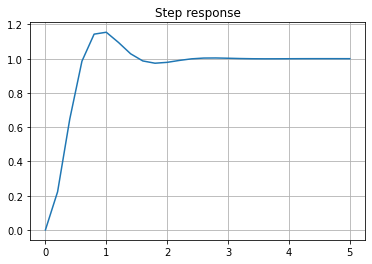

In [6]:
m1 = step_info(FTMF, 5, plot=True)   
pprint(m1)

2 states have been removed from the model
2 states have been removed from the model
System type: 1


/opt/conda/lib/python3.9/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/home/jovyan/work/07 (Projeto por Lugar das Raízes)/../control_utils.py:100: RuntimeWarning: divide by zero encountered in true_divide
  metrics['ess_parabola'] = np.array(1)/K


{'Kp': 1240062645171235.2,
 'ess_degrau': 8.064108727845062e-16,
 'Kv': 2.8001700878119165,
 'ess_rampa': 0.35712116358667734,
 'Ka': 0,
 'ess_parabola': inf}

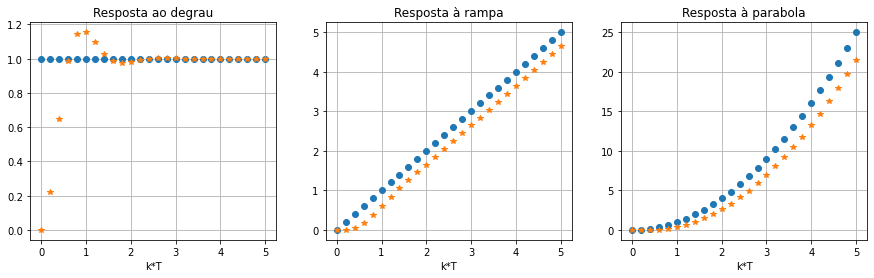

In [7]:
plot_responses(FTMF, 5)
errors(FTMA)

Text(0.5, 1.0, 'Amplitude da ação de controle')

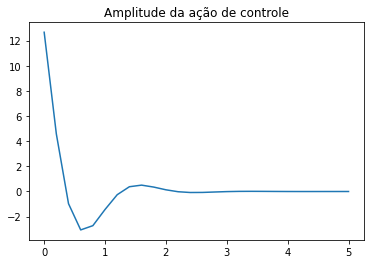

In [8]:
x, y_control = control.step_response(control.feedback(Gdz, Gz), 5)
plt.plot(x, y_control)
plt.title('Amplitude da ação de controle')